<a href="https://colab.research.google.com/github/gleesoi/Raystation-Scripts/blob/main/SIB_Model_Left_v9_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()

Saving SIB HEART MHD MODEL DATA FOR PYTHON_v4_LeftOnly.xlsx to SIB HEART MHD MODEL DATA FOR PYTHON_v4_LeftOnly.xlsx


In [2]:
import io
import pandas as pd
df = pd.read_excel(io.BytesIO(list(uploaded.values())[0]))
df.head()

,MRN,MHD SIB,Min_distance,Max_distance,Average_distance,OL_Length,PTVp_4800 vol,Heart vol,PTVp_4800 center to Heart center,PTVp_4800 center above Heart,Machine,Laterality,TEC
0,980244,0.47,2.38,12.00,7.50,2.8,25.48,454.59,8.3,no,V,L,TAN_VMAT
1,4849089,0.33,2.97,17.47,10.35,4.3,51.34,658.57,12.0,no,V,L,TAN_VMAT
2,4903799,0.43,7.90,17.56,12.42,4.1,106.55,520.27,14.5,no,E,L,TAN_VMAT
3,4896442,0.06,7.55,16.97,12.09,1.7,29.76,508.28,13.0,yes,V,L,TAN_VMAT
4,4893708,0.57,3.26,15.82,10.20,4.9,64.62,800.18,12.8,no,E,L,TAN_VMAT


In [3]:
df.shape

(108, 13)

In [4]:
df = df.dropna()

df = df.drop(['MRN'], 1)

df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  This is separate from the ipykernel package so we can avoid doing imports until


,MHD SIB,Min_distance,Max_distance,Average_distance,OL_Length,PTVp_4800 vol,Heart vol,PTVp_4800 center to Heart center,PTVp_4800 center above Heart,Machine,Laterality,TEC
0,0.47,2.38,12.00,7.50,2.8,25.48,454.59,8.3,no,V,L,TAN_VMAT
1,0.33,2.97,17.47,10.35,4.3,51.34,658.57,12.0,no,V,L,TAN_VMAT
2,0.43,7.90,17.56,12.42,4.1,106.55,520.27,14.5,no,E,L,TAN_VMAT
3,0.06,7.55,16.97,12.09,1.7,29.76,508.28,13.0,yes,V,L,TAN_VMAT
4,0.57,3.26,15.82,10.20,4.9,64.62,800.18,12.8,no,E,L,TAN_VMAT


In [5]:
df = df.drop(['TEC'], 1)
df = df.drop(['Laterality'], 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [6]:
df.head()

,MHD SIB,Min_distance,Max_distance,Average_distance,OL_Length,PTVp_4800 vol,Heart vol,PTVp_4800 center to Heart center,PTVp_4800 center above Heart,Machine
0,0.47,2.38,12.00,7.50,2.8,25.48,454.59,8.3,no,V
1,0.33,2.97,17.47,10.35,4.3,51.34,658.57,12.0,no,V
2,0.43,7.90,17.56,12.42,4.1,106.55,520.27,14.5,no,E
3,0.06,7.55,16.97,12.09,1.7,29.76,508.28,13.0,yes,V
4,0.57,3.26,15.82,10.20,4.9,64.62,800.18,12.8,no,E


In [7]:
df = pd.get_dummies(df, columns=['Machine', 'PTVp_4800 center above Heart'])


In [8]:
df.head()

,MHD SIB,Min_distance,Max_distance,Average_distance,OL_Length,PTVp_4800 vol,Heart vol,PTVp_4800 center to Heart center,Machine_E,Machine_V,PTVp_4800 center above Heart_no,PTVp_4800 center above Heart_yes
0,0.47,2.38,12.00,7.50,2.8,25.48,454.59,8.3,0,1,1,0
1,0.33,2.97,17.47,10.35,4.3,51.34,658.57,12.0,0,1,1,0
2,0.43,7.90,17.56,12.42,4.1,106.55,520.27,14.5,1,0,1,0
3,0.06,7.55,16.97,12.09,1.7,29.76,508.28,13.0,0,1,0,1
4,0.57,3.26,15.82,10.20,4.9,64.62,800.18,12.8,1,0,1,0


# Data processing for Regression Models

In [9]:
import sklearn

from sklearn import svm, preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import max_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score  ##this is for clasification only not regression models
from sklearn.metrics import r2_score
import statsmodels.api as sm
import seaborn as sns

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn import neighbors
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


X = df.drop(['MHD SIB'], axis=1).values  
#X = preprocessing.scale(X)   #this made model worse I think it rounds values
y = df['MHD SIB'].values

#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)   #when we set a random state any number it will keep same split sequence so results will be same when ran again

In [10]:
#scale
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# SVR LINEAR REGRESSION MODEL

In [11]:
clf = svm.SVR(kernel="linear")  
clf.fit(X_train, y_train)

SVR(kernel='linear')

In [12]:
y_predict = clf.predict(X_test)

In [13]:
print('SVR linear Accuracy =', clf.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('SVR linear R2 score =', r2_score(y_test, y_predict))   #true r2 value for regression
print('SVR linear Mean MHD difference =', mean_absolute_error(y_test, y_predict)) #MEAN ABS ERROR
print('SVR linear Max MHD difference =', max_error(y_test, y_predict))  #max error for test cases Gy
print('SVR linear Mean Sqrd error =', mean_squared_error(y_test, y_predict))

SVR linear Accuracy = 0.5843100495865696
SVR linear R2 score = 0.5843100495865696
SVR linear Mean MHD difference = 0.09998626977438684
SVR linear Max MHD difference = 0.26447207885277446
SVR linear Mean Sqrd error = 0.01616467057175862


Text(0.5, 1.0, 'SVR Linear SIB MHD Dose')

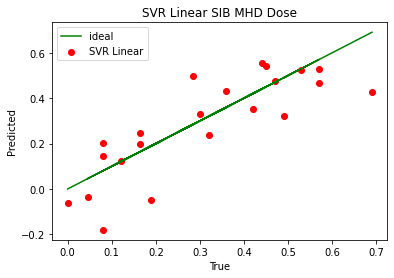

In [14]:
#PLOT
#SVR LINEAR PLOT
#plot predicted vs true values
y1 = y_test
plt.scatter(y1, y_predict, color = 'red', label='SVR Linear')
plt.xlabel('True')
plt.ylabel('Predicted')

x1 = y_test
plt.plot(x1, x1, label='ideal',color = 'g')
plt.legend()
plt.title('SVR Linear SIB MHD Dose')


# SVR POLY REGRESSION MODEL

In [15]:
poly = svm.SVR(kernel="poly")  
poly.fit(X_train, y_train)
y_poly_predict = poly.predict(X_test)
print('SVR poly Accuracy =', poly.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('SVR poly R2 score =', r2_score(y_test, y_poly_predict))   #true r2 value for regression
print('SVR poly Mean MHD difference =', mean_absolute_error(y_test, y_poly_predict)) #MEAN ABS ERROR
print('SVR poly Max MHD difference =', max_error(y_test, y_poly_predict))  #max error for test cases Gy
print('SVR poly Mean Sqrd error =', mean_squared_error(y_test, y_poly_predict))

SVR poly Accuracy = 0.36652008366390065
SVR poly R2 score = 0.36652008366390065
SVR poly Mean MHD difference = 0.11291947229583116
SVR poly Max MHD difference = 0.39101129596944134
SVR poly Mean Sqrd error = 0.024633730382978766


# SVR RBF REGRESSION MODEL

In [16]:
rbf = svm.SVR(kernel="rbf")  
rbf.fit(X_train, y_train)
y_rbf_predict = rbf.predict(X_test)
print('SVR rbf Accuracy =', rbf.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('SVR rbf R2 score =', r2_score(y_test, y_rbf_predict))   #true r2 value for regression
print('SVR rbf Mean MHD difference =', mean_absolute_error(y_test, y_rbf_predict)) #MEAN ABS ERROR
print('SVR rbf Max MHD difference =', max_error(y_test, y_rbf_predict))  #max error for test cases Gy
print('SVR rbf Mean Sqrd error =', mean_squared_error(y_test, y_rbf_predict))

SVR rbf Accuracy = 0.5800428566348126
SVR rbf R2 score = 0.5800428566348126
SVR rbf Mean MHD difference = 0.09926841174249025
SVR rbf Max MHD difference = 0.345851667621602
SVR rbf Mean Sqrd error = 0.01633060618858717


# LINEAR REGRESSION MODEL

In [17]:
linear = LinearRegression()
linear.fit(X_train, y_train)
y_linear_predict = linear.predict(X_test)
print('Linear Regression Accuracy =', linear.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('Linear Regression R2 score =', r2_score(y_test, y_linear_predict))   #true r2 value for regression
print('Linear Regression Mean MHD difference =', mean_absolute_error(y_test, y_linear_predict)) #MEAN ABS ERROR
print('Linear Regression Max MHD difference =', max_error(y_test, y_linear_predict))  #max error for test cases Gy
print('Linear Regression Mean Sqrd error =', mean_squared_error(y_test, y_linear_predict))

Linear Regression Accuracy = 0.3889517528171763
Linear Regression R2 score = 0.3889517528171763
Linear Regression Mean MHD difference = 0.11235571019502148
Linear Regression Max MHD difference = 0.35071820150204697
Linear Regression Mean Sqrd error = 0.02376144433931389


# KNN REGRESSION MODEL

RMSE value for k=  1 is: 0.03171363636363636
RMSE value for k=  2 is: 0.029293181818181812
RMSE value for k=  3 is: 0.025171717171717168
RMSE value for k=  4 is: 0.022098508522727264
RMSE value for k=  5 is: 0.023944999999999984
RMSE value for k=  6 is: 0.02542537878787878
RMSE value for k=  7 is: 0.027226020408163253
RMSE value for k=  8 is: 0.02763726917613635
RMSE value for k=  9 is: 0.025225434904601562
RMSE value for k=  10 is: 0.024635204545454533
RMSE value for k=  11 is: 0.024664913598797886
RMSE value for k=  12 is: 0.023379711174242413
RMSE value for k=  13 is: 0.023251949973103814
RMSE value for k=  14 is: 0.02274998260667903
RMSE value for k=  15 is: 0.02201650505050504
RMSE value for k=  16 is: 0.022120361328124994
RMSE value for k=  17 is: 0.022635089650833592
RMSE value for k=  18 is: 0.02274686798540965
RMSE value for k=  19 is: 0.023300648451271718
RMSE value for k=  20 is: 0.023462880681818177
RMSE value for k=  21 is: 0.022513280766852193
RMSE value for k=  22 is: 0.

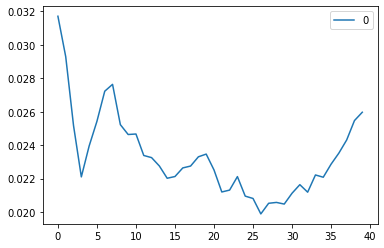

In [18]:
#FIND BEST VALUE OF K TO USE IN MODEL BY PLOTTING THE ERROR WITH DIFFERENT K VALUES IN MODEL
rmse_val = [] #to store rmse values for different k
for K in range(40):
    K = K+1
    knn = neighbors.KNeighborsRegressor(n_neighbors = K)

    knn.fit(X_train, y_train)  #fit the model
    y_knn_predict = knn.predict(X_test) #make prediction on test set
    error = mean_squared_error(y_test, y_knn_predict) #calculate rmse
    rmse_val.append(mean_squared_error(y_test, y_knn_predict)) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)
    
#plot the rmse values against k values # LOOKS LIKE k = 19? is lowest error so use k=4 in model for predicting
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [19]:
knn = neighbors.KNeighborsRegressor(n_neighbors = 3)  ##PICK 1 here as lowest error in plot above
knn.fit(X_train, y_train)  #fit the model
y_knn_predict = knn.predict(X_test)
print('knn Regression Accuracy =', knn.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('knn Regression R2 score =', r2_score(y_test, y_knn_predict))   #true r2 value for regression
print('knn Regression Mean MHD difference =', mean_absolute_error(y_test, y_knn_predict)) #MEAN ABS ERROR
print('knn Regression Max MHD difference =', max_error(y_test, y_knn_predict))  #max error for test cases Gy
print('knn Regression Mean Sqrd error =', mean_squared_error(y_test, y_knn_predict))

knn Regression Accuracy = 0.3526852393012533
knn Regression R2 score = 0.3526852393012533
knn Regression Mean MHD difference = 0.11969696969696969
knn Regression Max MHD difference = 0.45000000000000007
knn Regression Mean Sqrd error = 0.025171717171717168


# DECISION TREE REGRESSOR MODEL

In [20]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)  #fit the model
y_dt_predict = dt.predict(X_test)
print('dt Regression Accuracy =', dt.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('dt Regression R2 score =', r2_score(y_test, y_dt_predict))   #true r2 value for regression
print('dt Regression Mean MHD difference =', mean_absolute_error(y_test, y_dt_predict)) #MEAN ABS ERROR
print('dt Regression Max MHD difference =', max_error(y_test, y_dt_predict))  #max error for test cases Gy
print('dt Regression Mean Sqrd error =', mean_squared_error(y_test, y_dt_predict))

dt Regression Accuracy = -0.23924605493863282
dt Regression R2 score = -0.23924605493863282
dt Regression Mean MHD difference = 0.14795454545454542
dt Regression Max MHD difference = 0.7550000000000001
dt Regression Mean Sqrd error = 0.048189772727272734


**XGB Regressor**

In [27]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(X_train, y_train)
score = xgbr.score(X_train, y_train)  
print("Training score: ", score)


Training score:  0.9966117071464963


In [29]:
y_xgbr_predict = xgbr.predict(X_test)
print('xgbr Regression Accuracy =', xgbr.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('xgbr Regression R2 score =', r2_score(y_test, y_xgbr_predict))   #true r2 value for regression
print('xgbr Regression Mean MHD difference =', mean_absolute_error(y_test, y_xgbr_predict)) #MEAN ABS ERROR
print('xgbr Regression Max MHD difference =', max_error(y_test, y_xgbr_predict))  #max error for test cases Gy
print('xgbr Regression Mean Sqrd error =', mean_squared_error(y_test, y_xgbr_predict))


xgbr Regression Accuracy = 0.4433983951197309
xgbr Regression R2 score = 0.4433983951197309
xgbr Regression Mean MHD difference = 0.10582346878268499
xgbr Regression Max MHD difference = 0.4157689476013184
xgbr Regression Mean Sqrd error = 0.021644212407957733


Text(0.5, 1.0, 'xgbr SIB MHD Dose')

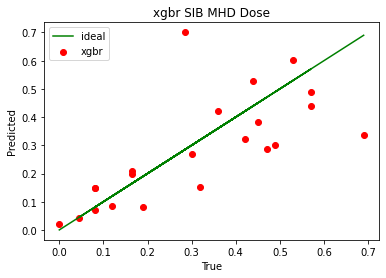

In [30]:
#PLOT
y11 = y_test
plt.scatter(y11, y_xgbr_predict, color = 'red', label='xgbr')
plt.xlabel('True')
plt.ylabel('Predicted')

x11 = y_test
plt.plot(x11, x11, label='ideal',color = 'g')
plt.legend()
plt.title('xgbr SIB MHD Dose')

# RANDOM FOREST REGRESSION MODEL

In [31]:
rf = RandomForestRegressor(random_state=42)  #uses default params such as no.est 100. #use random 42 if want same result each run? 'None' will  produce different results in every execution
rf.fit(X_train, y_train)  #fit the model
y_rf_predict = rf.predict(X_test)
print('RF Regression Accuracy =', rf.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('RF Regression R2 score =', r2_score(y_test, y_rf_predict))   #true r2 value for regression
print('RF Regression Mean MHD difference =', mean_absolute_error(y_test, y_rf_predict)) #MEAN ABS ERROR
print('RF Regression Max MHD difference =', max_error(y_test, y_rf_predict))  #max error for test cases Gy
print('RF Regression Mean Sqrd error =', mean_squared_error(y_test, y_rf_predict))


RF Regression Accuracy = 0.44785355347749856
RF Regression R2 score = 0.44785355347749856
RF Regression Mean MHD difference = 0.09966818181818184
RF Regression Max MHD difference = 0.4415499999999997
RF Regression Mean Sqrd error = 0.021470967499999993


In [32]:
#TEST EXAMPLE
user_input = [[5.89059, 16.529748, 11.528, 2.9, 54.58, 613.86, 13.1, 1, 0, 1, 0]]  ##raw input data by user gives 0.170Gy
user_test = scaler.transform(user_input)
user_test


array([[0.65967456, 0.5999687 , 0.61754386, 0.39726027, 0.1994025 ,
        0.32504069, 0.55963303, 1.        , 0.        , 1.        ,
        0.        ]])

In [33]:
guess = rf.predict(user_test)
print(guess[0])

0.18289999999999992


#TUNE THE RANDOM FOREST WITH GRID SEARCH CV TO GET BEST PARAMS

In [34]:
from pprint import pprint
pprint(rf.get_params())   #get current params from above 
#n_estimators = number of trees in the foreset
#max_features = max number of features considered for splitting a node
#max_depth = max number of levels in each decision tree
#min_samples_split = min number of data points placed in a node before the node is split
#min_samples_leaf = min number of data points allowed in a leaf node
#bootstrap = method for sampling data points (with or without replacement)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [35]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000]}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf2 = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf2_random = RandomizedSearchCV(estimator = rf2, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf2_random.fit(X_train, y_train)
#best params
rf2_random.best_params_


Fitting 5 folds for each of 100 candidates, totalling 500 fits


{'n_estimators': 780,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [37]:
#best rf2 params model accuracy
#best_random = rf2_random.best_estimator_
print (f'Train Accuracy rf2 - : {rf2_random.score(X_train,y_train):.3f}')
print (f'Test Accuracy rf2 - : {rf2_random.score(X_test,y_test):.3f}')
print (f'old Train Accuracy rf - : {rf.score(X_train,y_train):.3f}')
print (f'old Test Accuracy rf - : {rf.score(X_test,y_test):.3f}')


Train Accuracy rf2 - : 0.953
Test Accuracy rf2 - : 0.446
old Train Accuracy rf - : 0.967
old Test Accuracy rf - : 0.448


In [38]:
rf3 = RandomForestRegressor(n_estimators=200,max_depth=100,min_samples_split=2,min_samples_leaf=1,max_features="auto",random_state=42)  #uses default params such as no.est 100. #use random 42 if want same result each run? 'None' will  produce different results in every execution
rf3.fit(X_train, y_train)  #fit the model
y_rf3_predict = rf3.predict(X_test)
#y_rf3_predict = rf2_random.predict(X_test)
print('RF Regression Accuracy =', rf3.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('RF Regression R2 score =', r2_score(y_test, y_rf3_predict))   #true r2 value for regression
print('RF Regression Mean MHD difference =', mean_absolute_error(y_test, y_rf3_predict)) #MEAN ABS ERROR
print('RF Regression Max MHD difference =', max_error(y_test, y_rf3_predict))  #max error for test cases Gy
print('RF Regression Mean Sqrd error =', mean_squared_error(y_test, y_rf3_predict))

RF Regression Accuracy = 0.46912365283459945
RF Regression R2 score = 0.46912365283459945
RF Regression Mean MHD difference = 0.09662499999999992
RF Regression Max MHD difference = 0.44032500000000047
RF Regression Mean Sqrd error = 0.020643850681818187


# RIDGE REGRESSION MODEL

In [39]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

rr = Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,45,50,55,100]}
ridge_regressor = GridSearchCV(rr,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X_train, y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.08657e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.67262e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [40]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 1}
-0.019772376675124742


In [41]:
rr = Ridge(alpha=1.0)  #use this alpha 1 as found above to be best
rr.fit(X_train, y_train)  #fit the model
y_rr_predict = rr.predict(X_test)
print('RR Regression Accuracy =', rr.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('RR Regression R2 score =', r2_score(y_test, y_rr_predict))   #true r2 value for regression
print('RR Regression Mean MHD difference =', mean_absolute_error(y_test, y_rr_predict)) #MEAN ABS ERROR
print('RR Regression Max MHD difference =', max_error(y_test, y_rr_predict))  #max error for test cases Gy
print('RR Regression Mean Sqrd error =', mean_squared_error(y_test, y_rr_predict))

RR Regression Accuracy = 0.5230840121669751
RR Regression R2 score = 0.5230840121669751
RR Regression Mean MHD difference = 0.10802519829051092
RR Regression Max MHD difference = 0.2914458699507417
RR Regression Mean Sqrd error = 0.01854552852687058


# LASSO REGRESSION MODEL

In [42]:
from sklearn.linear_model import Lasso

la = Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,35,40,45,50,55,100]}
lasso_regressor = GridSearchCV(rr,parameters,scoring='neg_mean_squared_error',cv=5)
lasso_regressor.fit(X_train, y_train)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-0.019772376675124742


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=2.08657e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.67262e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


In [43]:
la = Lasso(alpha=1.0)  #use this alpha 1 as found above to be best
la.fit(X_train, y_train)  #fit the model
y_la_predict = la.predict(X_test)
print('Lasso Regression Accuracy =', la.score(X_test, y_test))  #get accuracy which is more for classifcation measure
print('Lasso Regression R2 score =', r2_score(y_test, y_la_predict))   #true r2 value for regression
print('Lasso Regression Mean MHD difference =', mean_absolute_error(y_test, y_la_predict)) #MEAN ABS ERROR
print('Lasso Regression Max MHD difference =', max_error(y_test, y_la_predict))  #max error for test cases Gy
print('Lasso Regression Mean Sqrd error =', mean_squared_error(y_test, y_la_predict))

Lasso Regression Accuracy = -0.03695225656277512
Lasso Regression R2 score = -0.03695225656277512
Lasso Regression Mean MHD difference = 0.17526427061310781
Lasso Regression Max MHD difference = 0.3479069767441861
Lasso Regression Mean Sqrd error = 0.0403233025222479


**NEURAL NETWORK**

In [82]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor


Epoch 1/100
3/3 [==============================] - 1s 108ms/step - loss: 99.5376 - mae: 9.1878 - mean_absolute_error: 9.1878 - val_loss: 14.8443 - val_mae: 3.7071 - val_mean_absolute_error: 3.7071
Epoch 2/100
3/3 [==============================] - 0s 18ms/step - loss: 41.6936 - mae: 5.8351 - mean_absolute_error: 5.8351 - val_loss: 7.5740 - val_mae: 2.6611 - val_mean_absolute_error: 2.6611
Epoch 3/100
3/3 [==============================] - 0s 19ms/step - loss: 7.6388 - mae: 2.6030 - mean_absolute_error: 2.6030 - val_loss: 50.0700 - val_mae: 6.9423 - val_mean_absolute_error: 6.9423
Epoch 4/100
3/3 [==============================] - 0s 16ms/step - loss: 32.6964 - mae: 5.4789 - mean_absolute_error: 5.4789 - val_loss: 7.0490 - val_mae: 2.6008 - val_mean_absolute_error: 2.6008
Epoch 5/100
3/3 [==============================] - 0s 18ms/step - loss: 16.5421 - mae: 3.7825 - mean_absolute_error: 3.7825 - val_loss: 22.1268 - val_mae: 4.6370 - val_mean_absolute_error: 4.6370
Epoch 6/100
3/3 [=====

<function matplotlib.pyplot.show(*args, **kw)>

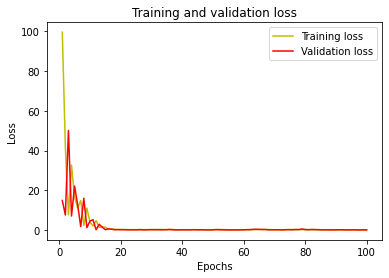

In [96]:
model = Sequential()
model.add(Dense(128, input_dim=11, activation='relu'))
model.add(Dense(64, activation='relu'))
#output layer
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mean_absolute_error'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=100)
#plot
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show





<function matplotlib.pyplot.show(*args, **kw)>

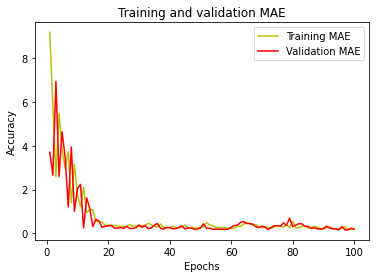

In [97]:
acc = history.history['mean_absolute_error']
val_acc = history.history['val_mean_absolute_error']
plt.plot(epochs, acc, 'y', label='Training MAE')
plt.plot(epochs, val_acc, 'r', label='Validation MAE')
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show

In [91]:
############################################
#Predict on test data
predictions = model.predict(X_test)
print("Predicted values are: ", predictions)
print("Real values are: ", y_test)
##############################################

1/1 [==============================] - 0s 102ms/step
Predicted values are:  [[0.24531302]
 [0.28461775]
 [0.29507384]
 [0.33586058]
 [0.9812692 ]
 [0.0513204 ]
 [0.1967996 ]
 [0.27252325]
 [0.14623961]
 [0.18887839]
 [0.23471388]
 [0.28216872]
 [0.1868814 ]
 [0.38309798]
 [0.16714224]
 [0.09777388]
 [0.1835607 ]
 [0.2932714 ]
 [0.20129523]
 [0.3293489 ]
 [0.15858397]
 [0.8165315 ]]
Real values are:  [0.36  0.46  0.09  0.02  0.28  0.09  0.63  0.05  0.06  0.075 0.49  0.57
 0.555 0.32  0.27  0.42  0.6   0.19  0.12  0.72  0.555 0.64 ]


In [93]:
#Comparison with other models..
#Neural network - from the current code
mse_neural, mae_neural = model.evaluate(X_test, y_test)
print('Mean squared error from neural net: ', mse_neural)
print('Mean absolute error from neural net: ', mae_neural)

1/1 [==============================] - 0s 28ms/step - loss: 0.0850 - mae: 0.2441
Mean squared error from neural net:  0.08500620722770691
Mean absolute error from neural net:  0.24412846565246582


Text(0.5, 1.0, 'NN SIB MHD Dose')

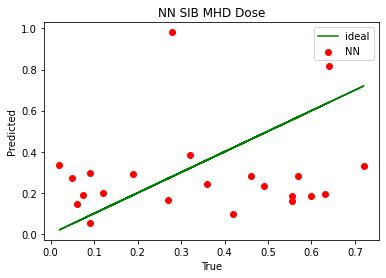

In [94]:
#PLOT
y12 = y_test
plt.scatter(y12, predictions, color = 'red', label='NN')
plt.xlabel('True')
plt.ylabel('Predicted')

x12 = y_test
plt.plot(x12, x12, label='ideal',color = 'g')
plt.legend()
plt.title('NN SIB MHD Dose')

**CROSS VALIDATION K FOLD ALL MODELS COMPARE**

In [44]:
from sklearn.model_selection import cross_val_score

In [45]:

scores = cross_val_score(clf, X, y, cv=5)
scores1 = cross_val_score(poly, X, y, cv=5)
scores2 = cross_val_score(rbf, X, y, cv=5)
scores3 = cross_val_score(linear, X, y, cv=5)
scores4 = cross_val_score(knn, X, y, cv=5)
scores5 = cross_val_score(dt, X, y, cv=5)
scores6 = cross_val_score(rf, X, y, cv=5)
scores7 = cross_val_score(rr, X, y, cv=5)
scores8 = cross_val_score(la, X, y, cv=5)
scores9 = cross_val_score(rf2_random, X, y, cv=5)
scores10 = cross_val_score(xgbr, X, y, cv=5)
print('SVR linear =', scores, 'mean', np.mean(scores))
print('SVR poly =', scores1, 'mean', np.mean(scores1))
print('SVR rbf =', scores2, 'mean', np.mean(scores2))
print('linear regression =', scores3, 'mean', np.mean(scores3))
print('knn =', scores4, 'mean', np.mean(scores4))
print('dec tree =', scores5, 'mean', np.mean(scores5))
print('random forest =', scores6, 'mean', np.mean(scores6))
print('ridge =', scores7, 'mean', np.mean(scores7))
print('lasso =', scores8, 'mean', np.mean(scores8))
print('random forest2 =', scores9, 'mean', np.mean(scores9))
print('xgbr =', scores10, 'mean', np.mean(scores10))

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
Fitting 5 folds for each of 100 candidates, totalling 500 fits
SVR linear = [0.71759204 0.6343333  0.63372998 0.68029835 0.74844384] mean 0.6828795001041609
SVR poly = [-0.19803381  0.28121451  0.23518255 -0.0535701   0.12844095] mean 0.07864682098381792
SVR rbf = [-0.1493197   0.14189505  0.19280805 -0.00679275  0.1413423 ] mean 0.0639865876837407
linear regression = [0.7096407  0.69422556 0.6021169  0.65924692 0.79486581] mean 0.6920191798284645
knn = [-0.2108363  -0.01017113 -0.13634315 -0.18805488  0.15104566] mean -0.07887195632809536
dec tree = [0.68968092 0.40944078 0.04333433 0.0603201  0.66325778] mean 0.3732067834035625
random forest = [0.843088   0.7017846  0.65483368 0.6321796  0.87537265] mean 0.7414517033744201
ridge = [0.71

In [46]:

print('###########################' + '\033[1m' + ' Cross_val_score, cv =5 ' + '########################################')
print ('\033[0m') # NO BOLD
print('SVR linear =', scores, 'mean', np.mean(scores))
print('SVR poly =', scores1, 'mean', np.mean(scores1))
print('SVR rbf =', scores2, 'mean', np.mean(scores2))
print('linear regression =', scores3, 'mean', np.mean(scores3))
print('knn =', scores4, 'mean', np.mean(scores4))
print('dec tree =', scores5, 'mean', np.mean(scores5))
print('\033[1m' +'random forest =', scores6, 'mean', np.mean(scores6))
print('\033[0m' + 'ridge =', scores7, 'mean', np.mean(scores7))
print('lasso =', scores8, 'mean', np.mean(scores8))
print('random forest2 =', scores9, 'mean', np.mean(scores9))
print('xgbr =', scores10, 'mean', np.mean(scores10))

########################### Cross_val_score, cv =5 ########################################

SVR linear = [0.71759204 0.6343333  0.63372998 0.68029835 0.74844384] mean 0.6828795001041609
SVR poly = [-0.19803381  0.28121451  0.23518255 -0.0535701   0.12844095] mean 0.07864682098381792
SVR rbf = [-0.1493197   0.14189505  0.19280805 -0.00679275  0.1413423 ] mean 0.0639865876837407
linear regression = [0.7096407  0.69422556 0.6021169  0.65924692 0.79486581] mean 0.6920191798284645
knn = [-0.2108363  -0.01017113 -0.13634315 -0.18805488  0.15104566] mean -0.07887195632809536
dec tree = [0.68968092 0.40944078 0.04333433 0.0603201  0.66325778] mean 0.3732067834035625
random forest = [0.843088   0.7017846  0.65483368 0.6321796  0.87537265] mean 0.7414517033744201
ridge = [0.71015379 0.69414896 0.60859997 0.664303   0.79765861] mean 0.6949728678798113
lasso = [-0.20065996  0.17818015  0.20452372 -0.01364851  0.08215928] mean 0.05011093618741811
random forest2 = [0.81948587 0.6884722  0.65297478 

# SVR Linear Regression Model Plots

Text(0, 0.5, 'Frequency')

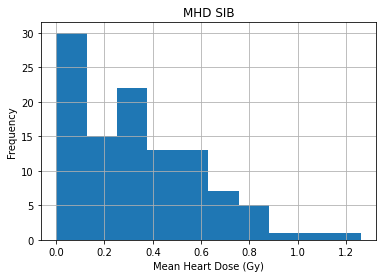

In [47]:
#plot histogram of MHD SIB data values
ax = df.hist('MHD SIB')
plt.xlabel('Mean Heart Dose (Gy)')
plt.ylabel('Frequency')

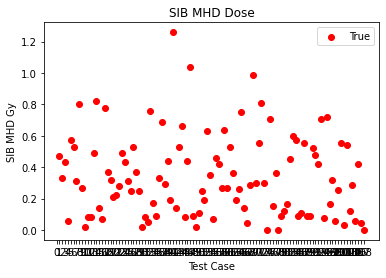

In [48]:
#scatter
#x = df.shape[0]
test_size = len(X_test) + len(X_train)  #e.g 13 is size of the test samples
#test_size = len(X_test + X_train)  #e.g 13 is size of the test samples
x = list(range(1, test_size+1))
plt.scatter(x, y, label='True', color = 'red')
plt.title('SIB MHD Dose')
plt.xlabel('Test Case')
plt.ylabel('SIB MHD Gy')
plt.xticks(np.arange(test_size+1), map(str, range(test_size + 1)))  # Set text labels

plt.legend()

In [49]:
table = pd.DataFrame({'Actual': y_test, 'Predicted SVR': y_predict, 'Difference SVR linear': y_predict - y_test, 'Predicted random forest': y_rf_predict, 'Difference random forest': y_rf_predict - y_test})
print(table)

    Actual  Predicted SVR  Difference SVR linear  Predicted random forest  \
0    0.000      -0.060624              -0.060624                  0.01820   
1    0.080       0.203832               0.123832                  0.14420   
2    0.570       0.468448              -0.101552                  0.45405   
3    0.570       0.526595              -0.043405                  0.57640   
4    0.190      -0.047968              -0.237968                  0.09835   
5    0.285       0.495608               0.210608                  0.72655   
6    0.080      -0.180415              -0.260415                  0.04455   
7    0.440       0.554371               0.114371                  0.53080   
8    0.165       0.199113               0.034113                  0.16570   
9    0.080       0.144017               0.064017                  0.16260   
10   0.450       0.542305               0.092305                  0.49070   
11   0.120       0.123232               0.003232                  0.18495   

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


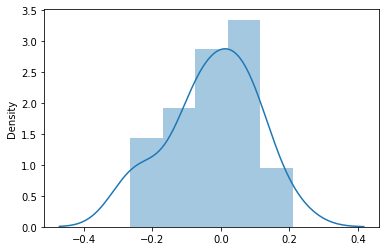

In [50]:
sns.distplot(y_predict - y_test) ##distribution of absolute differences between SVR linear y predict minus y test

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


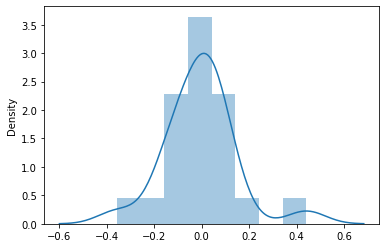

In [51]:
sns.distplot(y_rf_predict - y_test) ##distribution of absolute differences between random forest y predict minus y test

In [52]:
#example to predict a single case inputting the x scaled features in model
#user_input = [[3.4, 1.93, 2.9, 25.48, 8.3, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0]]  ##raw input data by user
user_input = [[1.0, 13.0, 5.0, 3.5, 100.0, 500.0, 6.0, 1, 0, 0, 1]]  ##raw input data by user
user_test = scaler.transform(user_input)

guess = clf.predict(user_test)
print(guess[0])

0.6748773486916925


In [53]:
user_input = [[5.89, 16.5, 11.5, 2.9, 54.58, 613.86, 13.1, 1, 0, 1, 0]]  ##raw input data by user
user_test = scaler.transform(user_input)

guess = rf.predict(user_test)
print(guess[0])

0.1842499999999999


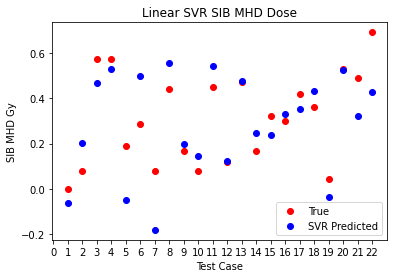

In [54]:
##plot test vs predict

test_size = len(X_test)  #e.g 13 is size of the test samples

#x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
x = list(range(1, test_size+1))


y1 = y_test  ##true values of test y
y2 = y_predict  #predicted values model y
plt.scatter(x, y1, label='True', color = 'red')
plt.scatter(x, y2, label='SVR Predicted', color = 'blue')
plt.title('Linear SVR SIB MHD Dose')
plt.xlabel('Test Case')
plt.ylabel('SIB MHD Gy')
#plt.xticks(np.arange(test_size+1), ['0','1', '2', '3','4', '5', '6','7', '8', '9', '10'])  # Set text labels
plt.xticks(np.arange(test_size+1), map(str, range(test_size + 1)))  # Set text labels

plt.legend()


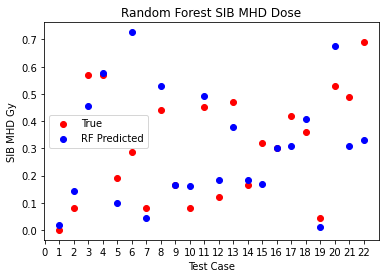

In [55]:
#rf plot

y1 = y_test  ##true values of test y
y2 = y_rf_predict  #predicted values model y - random forest
plt.scatter(x, y1, label='True', color = 'red')
plt.scatter(x, y2, label='RF Predicted', color = 'blue')
plt.title('Random Forest SIB MHD Dose')
plt.xlabel('Test Case')
plt.ylabel('SIB MHD Gy')
#plt.xticks(np.arange(test_size+1), ['0','1', '2', '3','4', '5', '6','7', '8', '9', '10'])  # Set text labels
plt.xticks(np.arange(test_size+1), map(str, range(test_size + 1)))  # Set text labels

plt.legend()

In [56]:
y_test

array([0.   , 0.08 , 0.57 , 0.57 , 0.19 , 0.285, 0.08 , 0.44 , 0.165,
       0.08 , 0.45 , 0.12 , 0.47 , 0.165, 0.32 , 0.3  , 0.42 , 0.36 ,
       0.045, 0.53 , 0.49 , 0.69 ])

Text(0.5, 1.0, 'Random forest SIB MHD Dose')

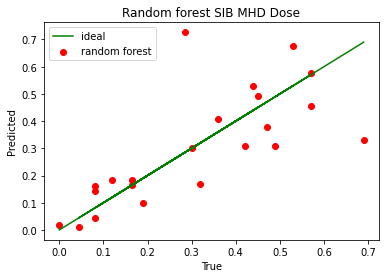

In [57]:
#RANDOM FOREST PLOT
#plot predicted vs true values
plt.scatter(y1, y2, color = 'red', label='random forest')
plt.xlabel('True')
plt.ylabel('Predicted')

x1 = y_test
plt.plot(x1, x1, label='ideal',color = 'g')
plt.legend()
plt.title('Random forest SIB MHD Dose')

Text(0.5, 1.0, 'SVR Linear SIB MHD Dose')

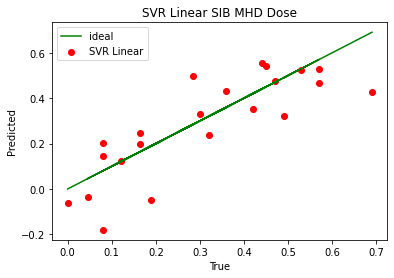

In [58]:
#SVR LINEAR PLOT
#plot predicted vs true values
plt.scatter(y1, y_predict, color = 'red', label='SVR Linear')
plt.xlabel('True')
plt.ylabel('Predicted')

x1 = y_test
plt.plot(x1, x1, label='ideal',color = 'g')
plt.legend()
plt.title('SVR Linear SIB MHD Dose')

Text(0.5, 1.0, 'Linear SVR vs forest SIB MHD Dose')

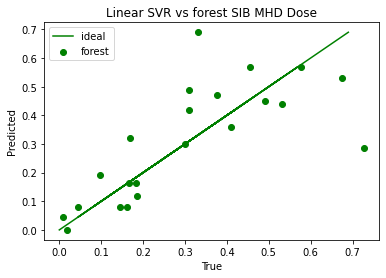

In [59]:
#plot predicted vs true values
x1 = y_test    ##true values of y in test
x2 = y_predict   ##predicted values of y in test
##plt.scatter(x1, x2, color = 'red', label='SVR linear')
plt.xlabel('True')
plt.ylabel('Predicted')

#plot random forest
x3= y_rf_predict
plt.scatter(x3, x1, color = 'green', label='forest')

#plot best fit line for data
#plt.plot(np.unique(x1), np.poly1d(np.polyfit(x1, x2, 1))(np.unique(x1)), label='best fit')
plt.plot(x1, x1, label='ideal',color = 'g')
plt.legend()
plt.title('Linear SVR vs forest SIB MHD Dose')


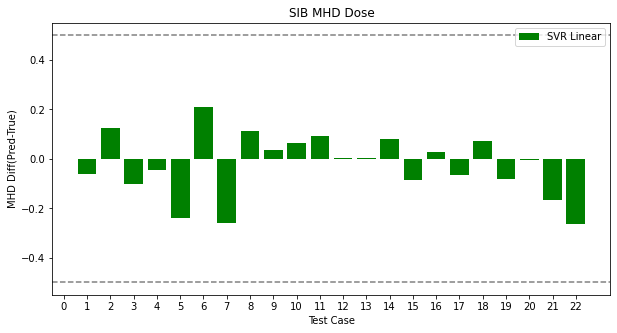

In [60]:
#plot barchart of the 10 test case differences between predicted - actual. also added in if we just 0.3Gy for all predictions
x = list(range(1, test_size+1))
y = y_predict - y_test 
plt.figure(figsize=(10,5))
plt.bar(x, y, label='SVR Linear',color='green') #model plot


plt.xlabel('Test Case')
plt.ylabel('MHD Diff(Pred-True)')
plt.title('SIB MHD Dose')


plt.xticks(np.arange(test_size+1), map(str, range(test_size + 1)))  # Set text labels
plt.legend(loc='best')
plt.axhline(0.5,c=(.5,.5,.5),ls='--')
plt.axhline(-0.5,c=(.5,.5,.5),ls='--')




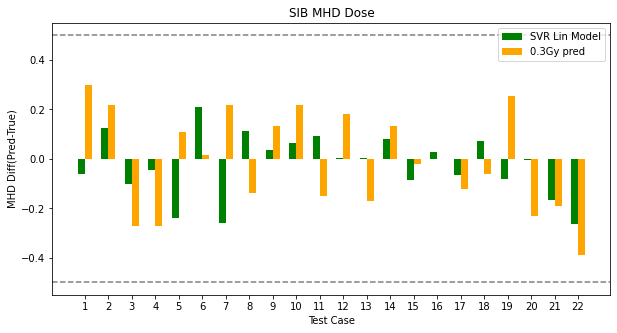

In [61]:
# Numbers of pairs of bars you want
N = test_size

# Data on X-axis

# Specify the values of blue bars (height)
green_bar = y_predict - y_test   #model predictions minus test
# Specify the values of orange bars (height)
orange_bar = 0.3 - y_test  ##this is using the median 0.3Gy for all predictions minus test to see how it compares to Model

# Position of bars on x-axis
ind = np.arange(N)

# Figure size
plt.figure(figsize=(10,5))

# Width of a bar 
width = 0.3       

# Plotting
plt.bar(ind, green_bar , width,color='green', label='SVR Lin Model')
plt.bar(ind + width, orange_bar, width,color='orange', label='0.3Gy pred')

plt.xlabel('Test Case')
plt.ylabel('MHD Diff(Pred-True)')
plt.title('SIB MHD Dose')

plt.axhline(0.5,c=(.5,.5,.5),ls='--')
plt.axhline(-0.5,c=(.5,.5,.5),ls='--')

# xticks() set in middle of bars and starts at 1 and end at test size+1
plt.xticks(ind + width / 2, (range(1,test_size+1)))



# Finding the best position for legends and putting it
plt.legend(loc='best')
plt.show()

# Linear Regression Model - Feature Selection Importance before test model

In [62]:
df.head()

,MHD SIB,Min_distance,Max_distance,Average_distance,OL_Length,PTVp_4800 vol,Heart vol,PTVp_4800 center to Heart center,Machine_E,Machine_V,PTVp_4800 center above Heart_no,PTVp_4800 center above Heart_yes
0,0.47,2.38,12.00,7.50,2.8,25.48,454.59,8.3,0,1,1,0
1,0.33,2.97,17.47,10.35,4.3,51.34,658.57,12.0,0,1,1,0
2,0.43,7.90,17.56,12.42,4.1,106.55,520.27,14.5,1,0,1,0
3,0.06,7.55,16.97,12.09,1.7,29.76,508.28,13.0,0,1,0,1
4,0.57,3.26,15.82,10.20,4.9,64.62,800.18,12.8,1,0,1,0


In [63]:
#from sklearn.linear_model import LinearRegression

 
#x = df[['PTVp_4800 center above Heart', 'PTVp_4800 center to Heart on slice', 'MED DRR closest slice','Location PTVp_4800', 'PTVp_4800 vol', 'PTVp_4800 center to Heart center', 'MED DRR Length', 'Heart vol']]
#y = df['MHD SIB']

X = df.drop(['MHD SIB'], axis=1).values  ##NOW LOOKING AT ALL VALUES AND COLUMNS INCLUDING HEART VOL
y = df['MHD SIB'].values

regressor = LinearRegression()
regressor.fit(X, y)

LinearRegression()

# Feature Importance - Linear Regression

In [64]:
predictions =  regressor.predict(X)

In [65]:
mean_absolute_error(y, predictions)

0.09802756737431496

In [66]:
mae = 0
for i in range(0, len(predictions)):
    prediction = predictions[i]
    #actual = y.iloc[i]
    actual = y[i]
    
    abs_error = abs(actual - prediction)
    mae = mae + abs_error
    
mae = mae / len(predictions)

In [67]:
print("mae:" , mae)
print("mean:" , actual.mean())
print("mae mean ratio:" ,100 *mae/actual.mean(), '%')

mae: 0.09802756737431492
mean: 0.0
mae mean ratio: inf %


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


# Equation

In [68]:
print(df.columns)

Index(['MHD SIB', 'Min_distance', 'Max_distance', 'Average_distance',
       'OL_Length', 'PTVp_4800 vol', 'Heart vol',
       'PTVp_4800 center to Heart center', 'Machine_E', 'Machine_V',
       'PTVp_4800 center above Heart_no', 'PTVp_4800 center above Heart_yes'],
      dtype='object')


In [69]:
columns = (['Min_distance', 'Max_distance', 'Average_distance',
       'OL_Length', 'PTVp_4800 vol', 'Heart vol',
       'PTVp_4800 center to Heart center', 'Machine_E', 'Machine_V',
       'PTVp_4800 center above Heart_no', 'PTVp_4800 center above Heart_yes'])

In [70]:
intercept = regressor.intercept_
features = pd.DataFrame(regressor.coef_, columns, columns=['coefficient'])
#features = pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(regressor.coef_))], axis = 1)
features.head() ##SHOWS ONLY TOP 5

,coefficient
Min_distance,-0.031934
Max_distance,0.019566
Average_distance,-0.068864
OL_Length,0.066427
PTVp_4800 vol,0.001436


In [71]:
features

,coefficient
Min_distance,-0.031934
Max_distance,0.019566
Average_distance,-0.068864
OL_Length,0.066427
PTVp_4800 vol,0.001436
Heart vol,-0.000147
PTVp_4800 center to Heart center,0.012917
Machine_E,0.011492
Machine_V,-0.011492
PTVp_4800 center above Heart_no,-0.004062


In [72]:
features.coefficient = features.coefficient.abs()

# Standard deviations

In [73]:
stdevs = []
for i in columns:
    stdev = df[i].std()
    stdevs.append(stdev)
 
#import numpy as np
features["stdev"] = np.array(stdevs).reshape(-1,1)
features["importance"] = features["coefficient"] * features["stdev"]

In [74]:
features['importance_normalized'] = 100*features['importance'] / features['importance'].max()
features

,coefficient,stdev,importance,importance_normalized
Min_distance,0.031934,2.031869,0.064885,52.886995
Max_distance,0.019566,1.923002,0.037625,30.667573
Average_distance,0.068864,1.781569,0.122686,100.000000
OL_Length,0.066427,1.757201,0.116726,95.142031
PTVp_4800 vol,0.001436,37.433004,0.053747,43.808713
Heart vol,0.000147,119.586670,0.017575,14.325467
PTVp_4800 center to Heart center,0.012917,2.126871,0.027473,22.392767
Machine_E,0.011492,0.462790,0.005318,4.334926
Machine_V,0.011492,0.462790,0.005318,4.334926
PTVp_4800 center above Heart_no,0.004062,0.435031,0.001767,1.440486


Text(0.5, 0, 'Feature importance')

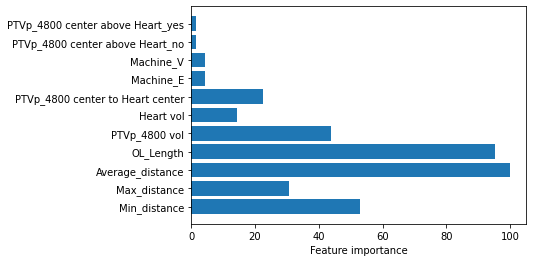

In [75]:
plt.barh(features.index, features.importance_normalized)
plt.xlabel('Feature importance')

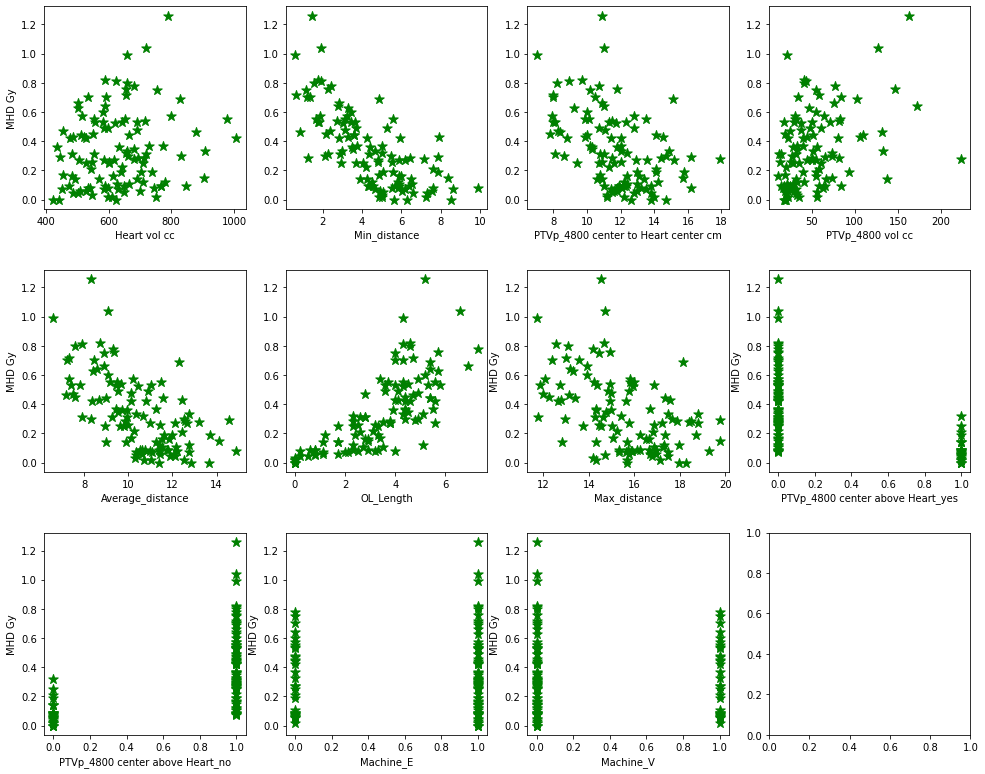

In [76]:
#plt.scatter(df['PTVp_4800 vol'],df['MHD SIB'])
y1 = df['MHD SIB']

x1 = df['Heart vol']
x2 = df['Min_distance']
x3 = df['PTVp_4800 center to Heart center']
x4 = df['PTVp_4800 vol']

x5 = df['Average_distance']

x6 = df['OL_Length']
x7 = df['Max_distance']

x8 = df['PTVp_4800 center above Heart_yes']
x9 = df['PTVp_4800 center above Heart_no']

x10 = df['Machine_E']
x11 = df['Machine_V']

#x12 = df['Laterality_L']
#x13 = df['Laterality_R']

##13 Features sue to dummy coding x values creating extra columns 


#plt.scatter(x1,y1, color='g',s=100,marker='*',label='WT')
plt.subplots(3,4, figsize=(16.6,13.4))

plt.subplot(3,4,1)
plt.scatter(x1,y1, color='g',s=100,marker='*')
plt.ylabel('MHD Gy')
plt.xlabel('Heart vol cc')

plt.subplot(3,4,2)
plt.scatter(x2,y1, color='g',s=100,marker='*')
plt.xlabel('Min_distance')

plt.subplot(3,4,3)
plt.scatter(x3,y1, color='g',s=100,marker='*')
plt.xlabel('PTVp_4800 center to Heart center cm')

plt.subplot(3,4,4)
plt.scatter(x4,y1, color='g',s=100,marker='*')
plt.xlabel('PTVp_4800 vol cc')

plt.subplot(3,4,5)
plt.scatter(x5,y1, color='g',s=100,marker='*')
plt.ylabel('MHD Gy')
plt.xlabel('Average_distance')

plt.subplot(3,4,6)
plt.scatter(x6,y1, color='g',s=100,marker='*')
plt.xlabel('OL_Length')

plt.subplot(3,4,7)
plt.scatter(x7,y1, color='g',s=100,marker='*')
plt.ylabel('MHD Gy')
plt.xlabel('Max_distance')

plt.subplot(3,4,8)
plt.scatter(x8,y1, color='g',s=100,marker='*')
plt.ylabel('MHD Gy')
plt.xlabel('PTVp_4800 center above Heart_yes')

plt.subplot(3,4,9)
plt.scatter(x9,y1, color='g',s=100,marker='*')
plt.ylabel('MHD Gy')
plt.xlabel('PTVp_4800 center above Heart_no')

plt.subplot(3,4,10)
plt.scatter(x10,y1, color='g',s=100,marker='*')
plt.ylabel('MHD Gy')
plt.xlabel('Machine_E')

plt.subplot(3,4,11)
plt.scatter(x11,y1, color='g',s=100,marker='*')
plt.ylabel('MHD Gy')
plt.xlabel('Machine_V')





plt.subplots_adjust(wspace=.2, hspace=.3)

# another method to get feature report

In [77]:
import statsmodels.api as sm

#y = df['MHD SIB']
#x = df[['PTVp_4800 center above Heart', 'PTVp_4800 center to Heart on slice', 'MED DRR closest slice','Location PTVp_4800', 'PTVp_4800 vol', 'PTVp_4800 center to Heart center', 'MED DRR Length', 'Heart vol']]
X = df[['Min_distance', 'Max_distance', 'Average_distance',
       'OL_Length', 'PTVp_4800 vol', 'Heart vol',
       'PTVp_4800 center to Heart center', 'Machine_E', 'Machine_V',
       'PTVp_4800 center above Heart_no', 'PTVp_4800 center above Heart_yes']]


X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm).fit()
lr
print(lr.summary())  ##p values larger and >0.05 not good features

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     29.37
Date:                Wed, 26 Oct 2022   Prob (F-statistic):           2.73e-21
Time:                        12:25:12   Log-Likelihood:                 56.379
No. Observations:                  86   AIC:                            -92.76
Df Residuals:                      76   BIC:                            -68.21
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
const   

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


**SAVE MODELS TO PICKLE FILES**

In [78]:
import pickle
import joblib

In [79]:
joblib.dump(rf, "rfmodel.pkl")

['rfmodel.pkl']

In [80]:
#save scaler and to load.  scaler = joblib.load(scaler_filename) 

In [81]:
scaler_filename = "scalerrf.pkl"
joblib.dump(scaler, scaler_filename) 

['scalerrf.pkl']